## EE 461P: Data Science Principles  
### Homework 2  
### Total points: 95
### Due: Feb 16, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):

1.

2 (if applicable).

# Q1. Bias-Variance Trade-off (20 points)

## 1.1 Bias-Variance Decomposition (10 points)
Consider a real-valued function $h(x)$. You were trying to estimate this function using a regression model on the dataset $D$ consisting of $(X, Y)$ pairs. Let the output of the training procedure be another function given by $y(x;D)$. This new function $y(x;D)$ depends on $D$ since it was obtained by regressing on $D$.

To evaluate how well $y(x;D)$ generalizes we are interested in computing the expected error $E_D [(y(x; D) - h(x))^2]$, where the expectation is over all datasets of the same size as $D$, each obtained by i.i.d. sampling from the underlying joint distribution of X and Y. Show that this expected error decomposes into a bias term plus a variance term that you have seen in lecture slides named '2A dsp regression1.pdf'.

Hint: 
Write
$$
  (y(x; D) - h(x))^2 = ( y(x; D) - E_D [y(x; D)] + E_D [y(x; D)] - h(x))^2 = (y(x; D) - E_D [y(x; D)])^2 + (E_D [y(x; D)] - h(x))^2 + 2 (y(x; D) - E_D [y(x; D)]) (E_D [y(x; D)] - h(x))
$$

And take expectation over $D$ on both sides

Answer:
$$
  (y(x; D) - h(x))^2 = ( y(x; D) - E_D [y(x; D)] + E_D [y(x; D)] - h(x))^2 = (y(x; D) - E_D [y(x; D)])^2 + (E_D [y(x; D)] - h(x))^2 + 2 (y(x; D) - E_D [y(x; D)]) (E_D [y(x; D)] - h(x))
$$

Running expectation on both sides 

$$
\begin{align*}
E_D [(y(x; D) - h(x))^2] &= E_D [(y(x; D) - E_D [y(x; D)])^2] + E_D [(E_D [y(x; D)] - h(x))^2] + 2 E_D [(y(x; D) - E_D [y(x; D)]) (E_D [y(x; D)] - h(x))] \\
&= (E_D [y(x; D)] - h(x))^2 + E_D [(y(x; D) - E_D [y(x; D)])^2] + 2 (E_D [y(x; D)] - h(x)) (E_D[y(x; D)] - E_D [y(x; D)]) \\
&= (E_D [y(x; D)] - h(x))^2 + E_D [(y(x; D) - E_D [y(x; D)])^2] + 2 (E_D [y(x; D)] - h(x)).0 \\ 
&= (E_D [y(x; D)] - h(x))^2 + E_D [(y(x; D) - E_D [y(x; D)])^2]
\end{align*}
$$

## 1.2 Bias-Variance Explanation (5 points)
Briefly explain the bias and variance formulas that were derived above and describe how they relate to underfitting/overfitting.

Answer:
Bias refers to how well can a trained model predict the true function whereas variance refers to how sensitive the trained model is to the set of training data. Low bias and high variance show there is overfitting of the model on the train data. On the other hand, when the bias is high it shows that the model could have fitted on the train data in a better way or is an underfitted model.


## 1.3 Underfitting vs Overfitting (5 points)
Suppose you have randomly divided the given dataset $D$ into a training dataset and a test dataset. Now you keep on gradually reducing the size of train dataset by moving some points to the test set. As the train set size decreases, what do you
expect will happen to the train and test errors? In your answers, consider both the expected values of these two quantities as well the spread (variance) in the values obtained. Justify briefly.

Answer:
As the size of the train set decreases, we expect the train error to reduce because with very few data points (and without any restriction on the complexity of the model), the model can very well fit (or even memorize) the train data. However, since this model does not generalize well to other datasets, the test error is expected to be high. 


# Q3. Stochastic Gradient Descent (20 points)

3.1 In class you studied about SGD wherein instead of computing the "full" gradient over all data points $\nabla f(w) = \dfrac{1}{N} ∑_{i=1}^{N} \nabla f_i(w)$, you just estimate the gradient based on one randomly selected data point $\nabla f_i(w)$ at a time, and use it to move forward in optimization. Show that this "stochastic gradient" is an unbiased estimator of the full gradient. (10 points)

3.2 Suppose you are using SGD optimization to solve a linear regression problem $y = w^Tx$ to obtain the $w$ that minimizes the mean squared error $E(w) = \dfrac{1}{N} \sum_{i=1}{N} (y_i - w^Tx_i)^2$ . Given that you initialise $w$ as $w_0$, write the one step update equation for $w$. Here $x$ is a vector with $M+1$ components. (10 points)

\## Answer:

3.1 We can write the gradient of the cost function for a single sample as $\nabla f_i(w)$
To estimate the full gradient, we can randomly select a sample i and use its gradient to compute the stochastic gradient:i and use its gradient to

$$\nabla f_i(w) \approx \nabla f_{\text{stochastic}}(w)$$
The expected value of the stochastic gradient is:

$$
\begin{aligned}
 \mathbb{E}[\nabla f_{\text{stochastic}}(w)] \
  &= \mathbb{E}[\nabla f_i(w)] \ 
  &= \sum_{i=1}^n \nabla f_i(w)p_i \ 
  &= \frac{1}{n} \sum_{i=1}^n \nabla f_i(w) \ 
  &= \nabla f(w) 
\end{aligned}
$$

, where $p_i$ is the probability of picking sample i =$\frac{1}{n}$ since we pick a sample randomly).

The last line follows from the definition of the full gradient. Therefore, we have shown that the stochastic gradient is an unbiased estimator of the full gradient, even when using a single sample in each update.



$$ \begin{align*} w^{(t+1)} = w^{(t)}-η \nabla E(w) \\ \dfrac{\delta E(w)_{x_i}}{\delta w}  = \Bigr(-2x_i(y_i-w^Tx_i)\Bigr) \\ w_{1} = w_{0} + 2 \eta x_i(y_i-w^Tx_i) \end{align*}$$




# Q4. Log-likelihood (10 points)

Consider a linear regression model $y = w.x + ϵ$. Here $x$ is a scalar. The noise  $ϵ$ is IID but depends on $x$ in a way described below:
$$
ϵ_i ∼ N(0, σ^2) \quad \text{if } x_i > 0 
$$
and   
$$
ϵ_i ∼ N(0, 4σ^2) \quad \text{if } x_i \leq 0 
$$
Given $n$ observations ${y_1,y_2, \dots y_n}$, derive the negative log-likelihood term for this assumed generative model. 

## Answer 4
$$
y_i \sim N(w.x_i, σ^2) \quad \text{if } x_i > 0 \\
y_i \sim N(w.x_i, 4σ^2) \quad \text{if } x_i \leq 0 
$$

\begin{align*}
    LL(y; w, σ) &= P(y : w, σ) \\
    &= ∏_{i=1}^{n} P(y_i : w, σ)  \\
    &= ∏_{i=1}^{n} \left\{ \dfrac{1}{\sqrt{2\pi \sigma^2}} exp\big(\dfrac{-1}{2\sigma^2} (y_i - w.x_i)^2 \big)\right\}^{\mathbb{1}(x_i > 0)} \times \left\{\dfrac{1}{\sqrt{2\pi 4\sigma^2}} exp\big(\dfrac{-1}{8\sigma^2} (y_i - w.x_i)^2 \big)\right\}^{\mathbb{1}(x_i \leq 0)}\\
    log(LL(y; w, σ)) &= ∑_{i=1}^{n} \mathbb{1}(x_i > 0).\big(\dfrac{-1}{2}log2\pi - \dfrac{1}{2} log \sigma^2 - \dfrac{1}{2\sigma^2} (y_i - w.x_i)^2 \big) + \mathbb{1}(x_i \leq 0).\big(\dfrac{-1}{2}log2\pi - \dfrac{1}{2} log 4 \sigma^2 - \dfrac{1}{8\sigma^2} (y_i - w.x_i)^2 \big) 
  \end{align*}


# Q5. Model Complexity and Bias/Variance Trade-off (35 points)

5.1 Load the data given in `all_data_q5.npy` using `numpy.load()` function. This dataset contains the train and test datasets in `(x_train, y_train)` and `(x_test, y_test)` respectively. 

Now, fit the polynomial models of degrees 1, 5, and 10 on the training data, and print out the mean squared error for train and test datasets for all the models. Essentially, we are trying to fit linear models of this form: $\hat f(x) = \beta_0 + \beta_1x + \beta_1 x^2 + ... + \beta_px^p$, where $p$ is the degree of the polynomial. (10 points)

Visualise the trained models by making predictions on evenly spaced numbers on x-axis in a fixed range, for eg. you can generate x's by calling `x_all = np.linspace(0, 1, 75).reshape(-1,1)` and call predict on x_all.

In the same figure, add the following plots:

i) Train data plot : y_train vs x_train

ii) Test data plot : y_test vs x_test

All the plots must clearly labeled. (10 points)



**Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train` and you can call `np.vander` inside the fit method of linear regression. 


Make use of the starter code we have provided, and fill the `plot_curves` function.

In [ ]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./all_data_q5.npy', allow_pickle=True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test = data_load.item().get("y_test")

lrp = LinearRegression()

In [ ]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 1, 5, 10 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
  print("IMPLEMENT ME!")
  return [0, 0, 0], [0, 0, 0]

Fit the different polynomials to the training data and make the plots:

---



In [ ]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

IMPLEMENT ME!


5.3 Which model gives the best performance (measured by MSE)? Explain in terms of the bias-variance tradeoff. (5 points)


5.4 Analyse how the training data size affects bias and variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. For each of the three models, plot $log(MSE)$ on train dataset vs the size of the training data and again $log(MSE)$ on test dataset vs the size of the training data. State the trends you see as you change the size of the training data on each of the models and explain why you see them. All plots must be in a single figure and labelled correctly. (10 points)

Study the effects of the training data size on the bias and variance

In [ ]:
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

20% data
IMPLEMENT ME!
40% data
IMPLEMENT ME!
60% data
IMPLEMENT ME!
80% data
IMPLEMENT ME!
100% data
IMPLEMENT ME!


## Answer:

## 5.1

In [ ]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_curves(x_train, y_train, x_test, y_test):
  # Define plot styles and colors for each model 
  degs = [1, 5, 10]
  plot_styles = ['-', '-.', 'o']
  point_colors = ['blue', 'red', 'green']
  fig, ax = plt.subplots(1, 1, figsize=(12,12))

  # Plot the train and test data 
  ax.plot(x_train, y_train,'ok', label='Train data')
  ax.plot(x_test.reshape(-1,1), y_test.reshape(-1,1), 'or', label='Test data')

  train_rmses, test_rmses = [], []
  # For each degree plot, zip packages the values into a tuple to iterate 
  for deg, plot_style, point_color in zip(degs, plot_styles, point_colors):
      lrp = LinearRegression()
      # np.vander - generate the power of the input vector i.e, the columns of the output matrix are powers of the input vector
      lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
      # Generate the predictions for test set and x_all 
      y_pred = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
      y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))

      # compute mean squared error
      mse = mean_squared_error(y_test, y_pred)
      y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), deg+1))
      mse_train = mean_squared_error(y_train, y_pred_train)

      train_rmses.append(mse_train)
      test_rmses.append(mse)

      ax.plot(x_all, y_all ,label='degree %d, train mse %.3f, test mse %.3f' % (deg, mse_train, mse))
      # ax.plot(x_test, y_pred, 'o')
      ax.legend(loc=2)

      # Limit the graph to visualize the plot better
      ax.set_ylim([-1.5,1.5])
      # ax.set_xlim([-5,5])
      print('Degree %d train mse = %.3f' % (deg, mse_train))
      print('Degree %d test mse = %.3f' % (deg, mse))
  plt.show()
  return train_rmses, test_rmses

Degree 1 train mse = 0.321
Degree 1 test mse = 0.376
Degree 5 train mse = 0.097
Degree 5 test mse = 0.097
Degree 10 train mse = 0.080
Degree 10 test mse = 0.265


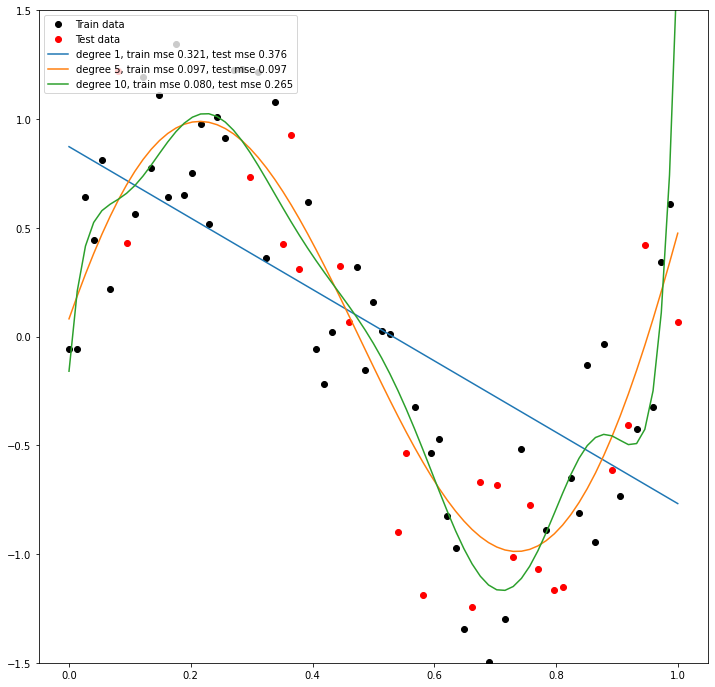

In [ ]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

20% data
Degree 1 train mse = 0.193
Degree 1 test mse = 0.402
Degree 5 train mse = 0.038
Degree 5 test mse = 0.160
Degree 10 train mse = 0.001
Degree 10 test mse = 8.621


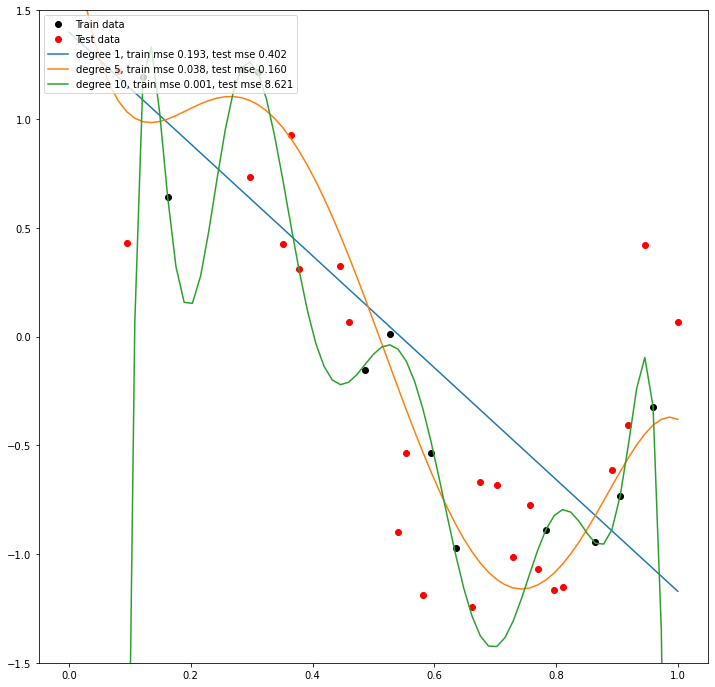

40% data
Degree 1 train mse = 0.248
Degree 1 test mse = 0.396
Degree 5 train mse = 0.072
Degree 5 test mse = 0.133
Degree 10 train mse = 0.048
Degree 10 test mse = 2.940


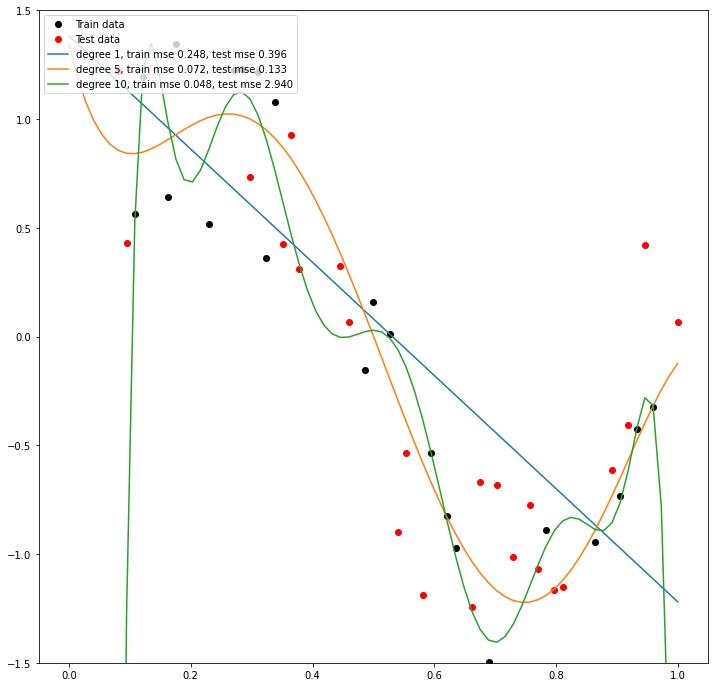

60% data
Degree 1 train mse = 0.358
Degree 1 test mse = 0.376
Degree 5 train mse = 0.068
Degree 5 test mse = 0.133
Degree 10 train mse = 0.053
Degree 10 test mse = 0.262


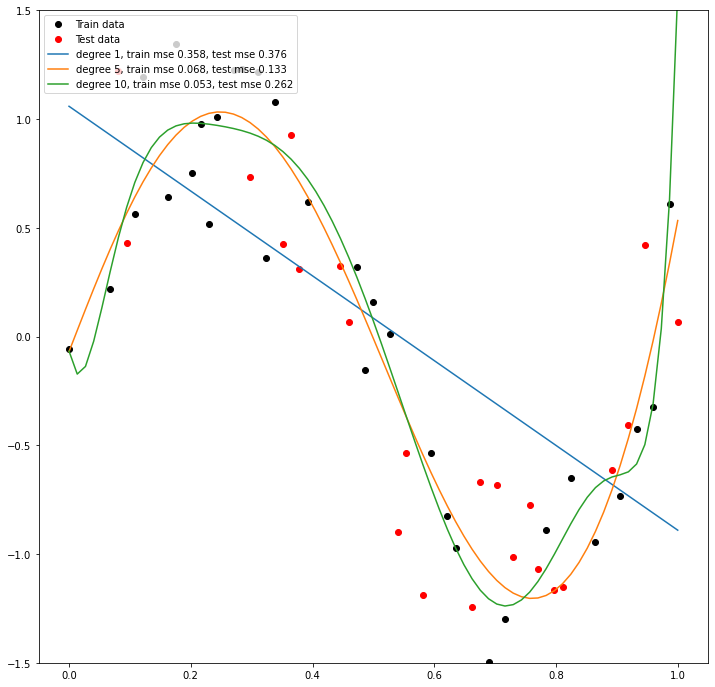

80% data
Degree 1 train mse = 0.338
Degree 1 test mse = 0.385
Degree 5 train mse = 0.078
Degree 5 test mse = 0.116
Degree 10 train mse = 0.070
Degree 10 test mse = 0.228


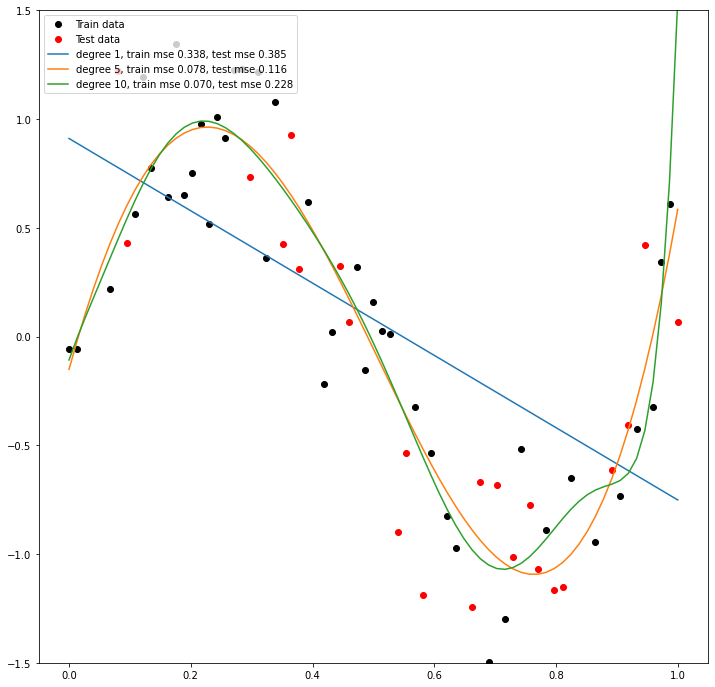

100% data
Degree 1 train mse = 0.321
Degree 1 test mse = 0.376
Degree 5 train mse = 0.097
Degree 5 test mse = 0.097
Degree 10 train mse = 0.080
Degree 10 test mse = 0.265


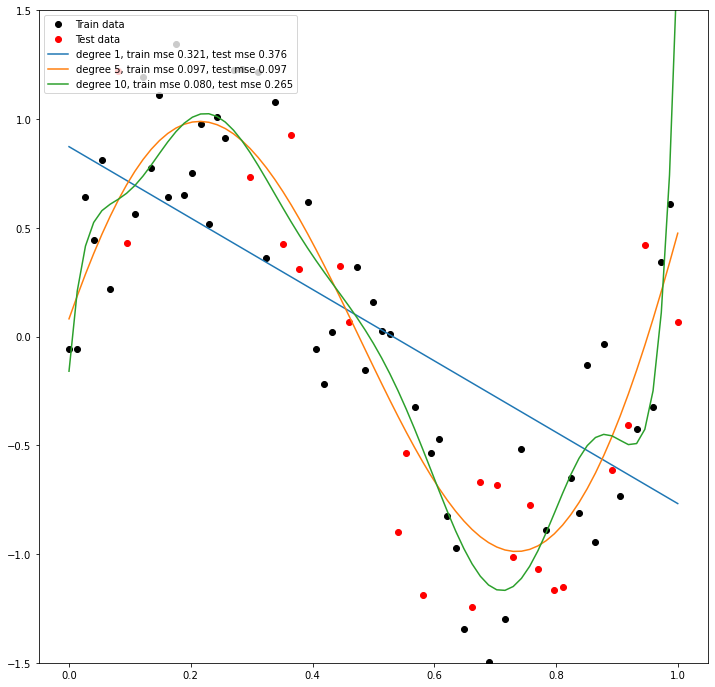

In [ ]:
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

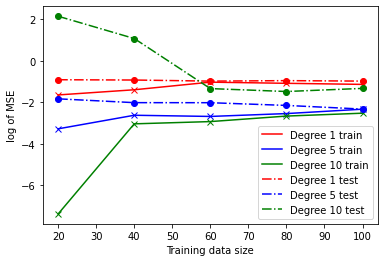

In [ ]:
train_rmses = [train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]
test_rmses = [test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]

degrees = [1, 5, 10]

color = ['r', 'b', 'g']
dataset_size = [20, 40, 60, 80, 100]
for deg in range(3):
    plt.plot(dataset_size, np.log(np.asarray(train_rmses)[:, deg]), '-'+color[deg], label='Degree ' + str(degrees[deg])+' train')
    plt.plot(dataset_size, np.log(np.asarray(train_rmses)[:, deg]), 'x'+color[deg])

for deg in range(3):
    plt.plot(dataset_size, np.log(np.asarray(test_rmses)[:, deg]), '-.'+color[deg], label='Degree ' + str(degrees[deg])+' test')
    plt.plot(dataset_size, np.log(np.asarray(test_rmses)[:, deg]), 'o'+color[deg])
plt.legend(loc=0)
plt.ylabel('log of MSE')
plt.xlabel('Training data size')
plt.show()